In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('recursos_humanos.csv')

# Mostrar las primeras filas
print(data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [4]:
print(data.isnull().sum())

# Codificar variables categóricas
data = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

# Separar características y variable objetivo
X = data.drop('left', axis=1)
y = data['left']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


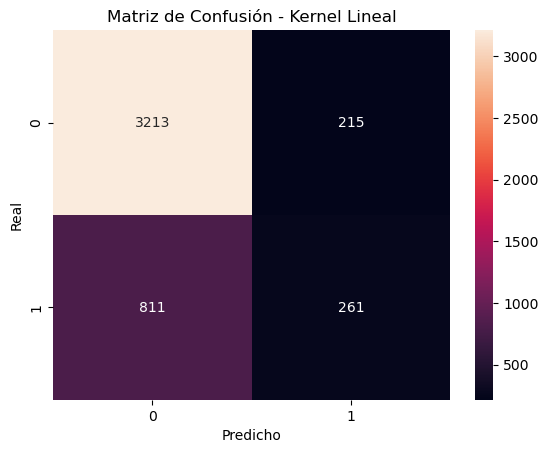

Reporte de Clasificación - Kernel Lineal:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3428
           1       0.55      0.24      0.34      1072

    accuracy                           0.77      4500
   macro avg       0.67      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



In [10]:
# Crear y entrenar el modelo
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predecir
y_pred_linear = svm_linear.predict(X_test)

# Matriz de confusión
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d')
plt.title('Matriz de Confusión - Kernel Lineal')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación - Kernel Lineal:")
print(classification_report(y_test, y_pred_linear))

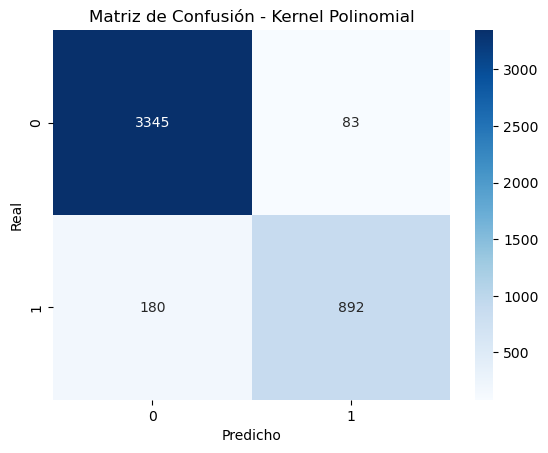

Reporte de Clasificación - Kernel Polinomial:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3428
           1       0.91      0.83      0.87      1072

    accuracy                           0.94      4500
   macro avg       0.93      0.90      0.92      4500
weighted avg       0.94      0.94      0.94      4500



In [14]:
# Crear y entrenar el modelo
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

# Predecir
y_pred_poly = svm_poly.predict(X_test)

# Matriz de confusión
cm_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Kernel Polinomial')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación - Kernel Polinomial:")
print(classification_report(y_test, y_pred_poly))

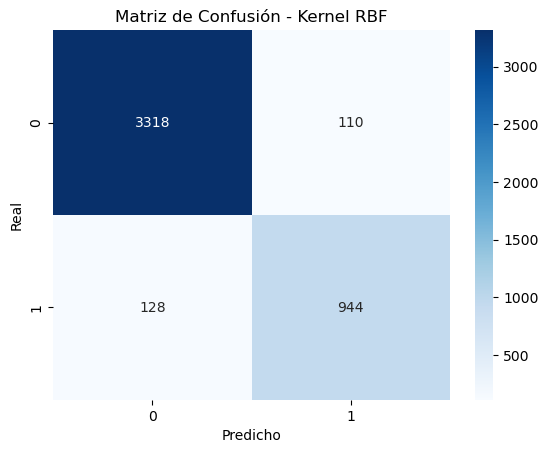

Reporte de Clasificación - Kernel RBF:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3428
           1       0.90      0.88      0.89      1072

    accuracy                           0.95      4500
   macro avg       0.93      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500



In [16]:
# Crear y entrenar el modelo
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predecir
y_pred_rbf = svm_rbf.predict(X_test)

# Matriz de confusión
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Kernel RBF')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación - Kernel RBF:")
print(classification_report(y_test, y_pred_rbf))

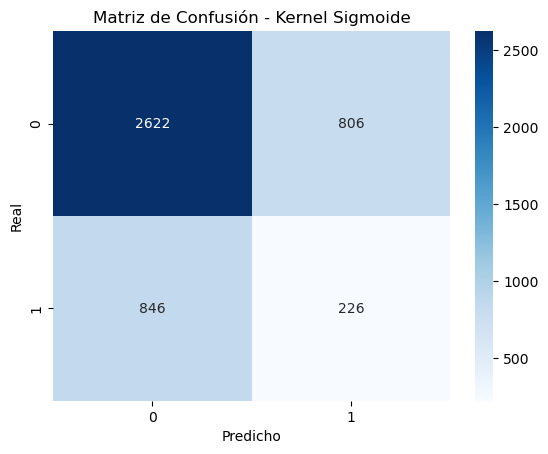

Reporte de Clasificación - Kernel Sigmoide:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      3428
           1       0.22      0.21      0.21      1072

    accuracy                           0.63      4500
   macro avg       0.49      0.49      0.49      4500
weighted avg       0.63      0.63      0.63      4500



In [20]:
# Crear y entrenar el modelo
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid.fit(X_train, y_train)

# Predecir
y_pred_sigmoid = svm_sigmoid.predict(X_test)

# Matriz de confusión
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Kernel Sigmoide')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación - Kernel Sigmoide:")
print(classification_report(y_test, y_pred_sigmoid))

In [22]:
# Datos del nuevo empleado (ejemplo)
nuevo_empleado = {
    'satisfaction_level': 0.45,
    'last_evaluation': 0.65,
    'average_montly_hours': 220,
    'time_spend_company': 4,
    'work_accident': 0,
    'promotion_last_5years': 0,
    'sales_technical': 1,  # Suponiendo que trabaja en technical
    'salary_medium': 1     # Suponiendo que tiene salario medium
}

# Convertir a dataframe y asegurar todas las columnas
nuevo_empleado_df = pd.DataFrame([nuevo_empleado])

# Asegurar que tenga todas las columnas (rellenar con 0 las faltantes)
for col in X.columns:
    if col not in nuevo_empleado_df.columns:
        nuevo_empleado_df[col] = 0

# Reordenar columnas
nuevo_empleado_df = nuevo_empleado_df[X.columns]

# Estandarizar
nuevo_empleado_scaled = scaler.transform(nuevo_empleado_df)

# Predecir con el mejor modelo (suponiendo que es RBF)
prediccion = svm_rbf.predict(nuevo_empleado_scaled)

print("Predicción para el nuevo empleado (1=se va, 0=se queda):", prediccion[0])

Predicción para el nuevo empleado (1=se va, 0=se queda): 1
